 # **Part 5 - Exploratory Data Analysis**
 
 In this notebook, I will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.

## Objectives

 - Identify the distribution of data in the dataset.
 
 - Identify correlation between features in the dataset.

 - Identify outliers in the dataset.

 - Remove outliers from the dataset.

 - Analyze employment status, job satisfaction, programming language usage, and trends in remote work.

## Data Preparation

### _1. Installing and Importing Libraries_

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  _2. Loading the Dataset_

In [3]:
# Loading the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Setting pandas option to display all columns
pd.set_option('display.max_columns', None)

# Displaying the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### _3. Removing Duplicates_

In [3]:
# Removing duplicate rows from the dataset using the drop_duplicates() function
df_no_duplicates = df.drop_duplicates()

In [4]:
# Verifying the removal by counting the number of duplicate rows after removal 
print(f"Number of rows after removing duplicates: {len(df_no_duplicates)}")

Number of rows after removing duplicates: 65437


### _4. Handling Missing Data_

In [5]:
# Identifying missing values for all columns
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [6]:
# Imputing numeric columns with mean
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(lambda col: col.fillna(col.mean()))

In [7]:
# Imputing categorical columns with mode
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').fillna(df.mode().iloc[0])

In [8]:
# Verifying no more missing values left
missing_values = df.isnull().sum()
print(missing_values)

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Experience and Job Satisfaction

In this section, I will analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`).

### _1. Visualizing Job Satisfaction_

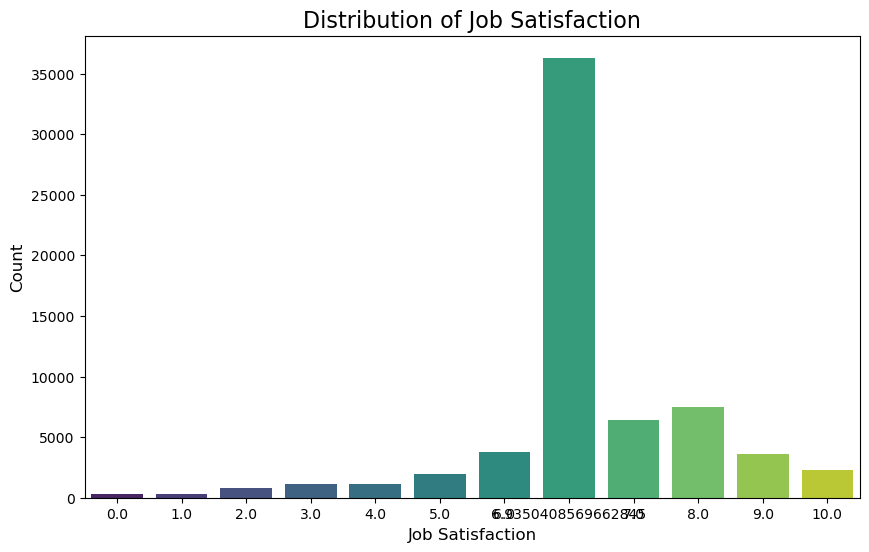

In [10]:
# Creating the count plot for JobSat values
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### _2. Analyzing Experience and Job Satisfaction_

Step 1: Creating experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).

In [12]:
# Handle missing values by filling them with a default value or drop rows with NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Defining the bins and labels for experience ranges
bins = [0, 5, 10, 20, float('inf')]  # Setting the bins: 0-5, 5-10, 10-20, >20
labels = ['0-5', '5-10', '10-20', '>20']  # Setting the labels for the ranges

# Creating a new column for experience ranges based on YearsCodePro
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Create a copy of the DataFrame to avoid fragmentation
df_copy = df.copy()

# Create the 'ExperienceRange' column in the copied DataFrame
df_copy['ExperienceRange'] = pd.cut(df_copy['YearsCodePro'], bins=bins, labels=labels, right=False)

# Displaying the first few rows to check the new column
print(df[['YearsCodePro', 'ExperienceRange']].head())

   YearsCodePro ExperienceRange
0           2.0             0-5
1          17.0           10-20
2          27.0             >20
3           2.0             0-5
4           2.0             0-5


Step 2: Calculating the median JobSat for each range.

In [13]:
# Grouping by 'ExperienceRange' and calculate the median of 'JobSat'
median_jobsat_by_range = df.groupby('ExperienceRange', observed=True)['JobSat'].median()

# Display the result
print("Median Job Satisfaction for each Experience Range:")
print(median_jobsat_by_range)

Median Job Satisfaction for each Experience Range:
ExperienceRange
0-5      6.935041
5-10     6.935041
10-20    6.935041
>20      6.935041
Name: JobSat, dtype: float64


Step 3: Visualizing the relationship using a grouped bar chart visualization.

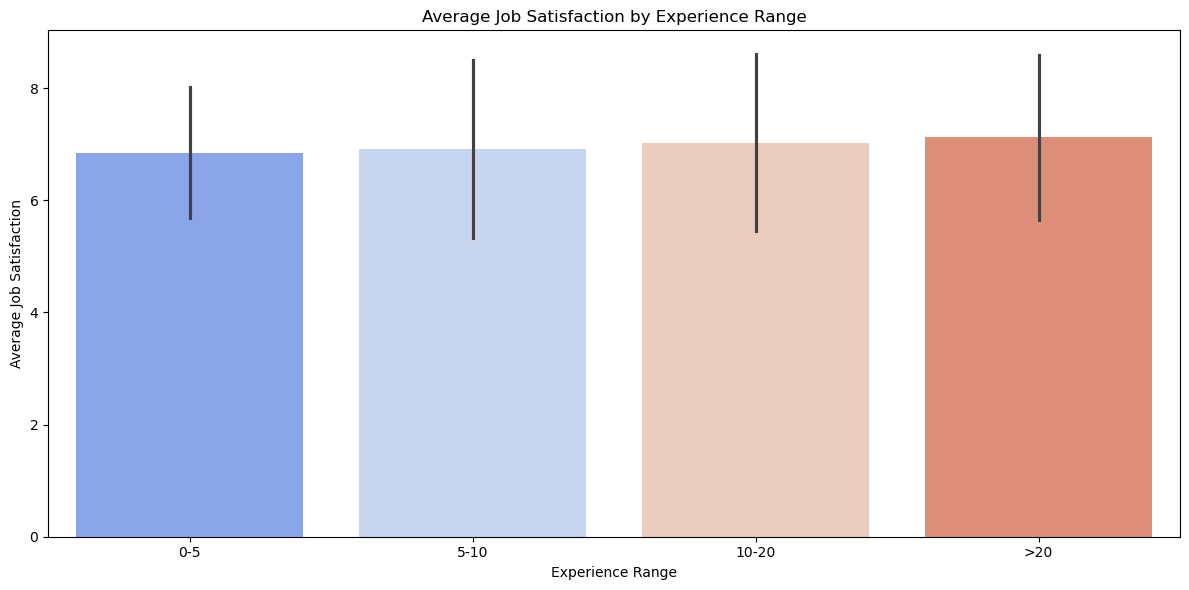

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=df, ci='sd', palette='coolwarm')
plt.title("Average Job Satisfaction by Experience Range")
plt.xlabel("Experience Range")
plt.ylabel("Average Job Satisfaction")
plt.tight_layout()
plt.show()

### _3. Correlation Between Experience and  Job Satisfaction_

To examine the correlation between years of experience (YearsCodePro) and job satisfaction (JobSatPoints_1), I will create a scatter plot to visualize the relationship between these two variables.

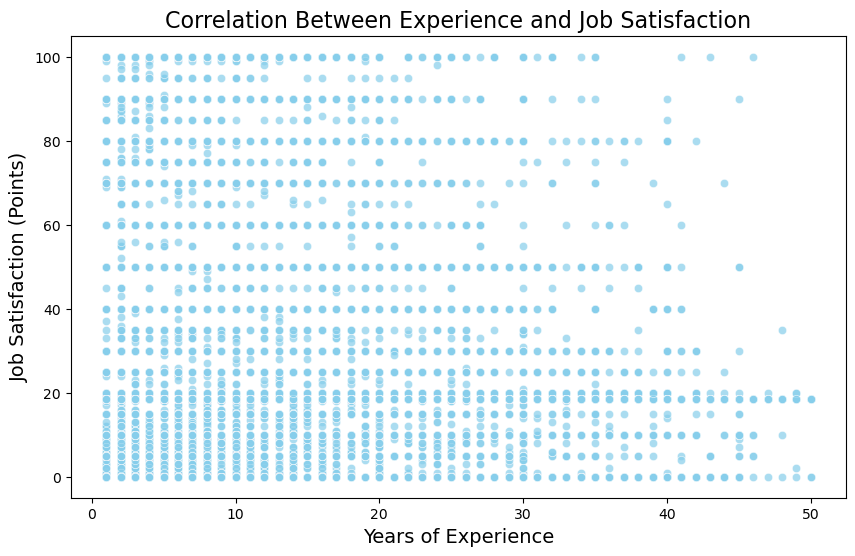

In [15]:
# Creating scatter plot between years of experience and job satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', color='skyblue', alpha=0.7)

# Adding titles and labels
plt.title('Correlation Between Experience and Job Satisfaction', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Job Satisfaction (Points)', fontsize=14)

plt.show()

## Remote Work 



### _1. Analyzing Remote Work Preferences by Job Role_

To analyze trends in remote work based on job roles and employment types, I will create a count plot to show the distribution of remote work preferences across job roles.

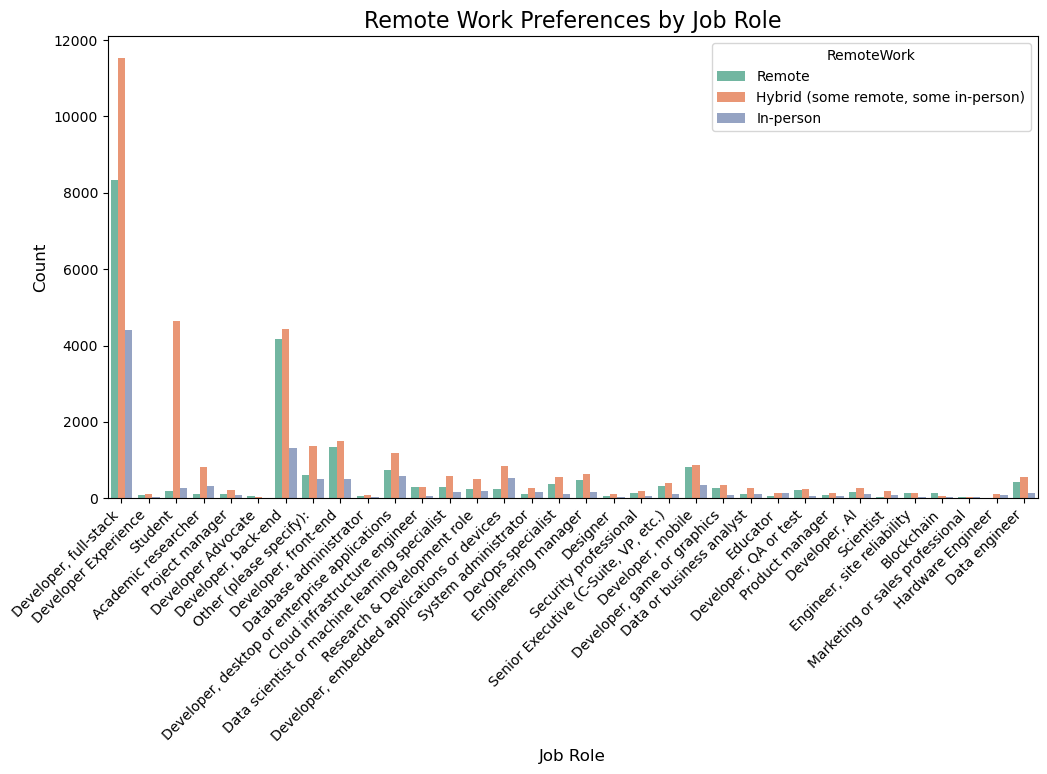

In [16]:
# Creating the count plot for RemoteWork by Job Role (DevType)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DevType', hue='RemoteWork', palette='Set2')

# Adding titles and labels
plt.title('Remote Work Preferences by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

## Programming Languages

### _1. Analyzing Programming Language Trends by Region (United States)_

To analyze the popularity of programming languages by region, I will:

1). Filter data by country to analyze trends in that area.

2). Extract and process the LanguageHaveWorkedWith column to identify the most used programming languages.

3). Visualize the top programming languages by region using a bar plot.

Step 1: Filtering data by country or region.

In [17]:
# Filter data for a specific region (United States of America)
region_data = df[df['Country'] == 'United States of America']

Step 2: Splitting the LanguageHaveWorkedWith column.

In [18]:
# Creating a copy of the region data to avoid fragmentation
region_data = df[df['Country'] == 'United States of America'].copy()

# Splitting the 'LanguageHaveWorkedWith' column to create a list of languages
region_data['Languages'] = region_data['LanguageHaveWorkedWith'].str.split(';')

# Removing rows with empty lists and drop any missing values
region_data = region_data[region_data['Languages'].apply(lambda x: len(x) > 0)]

# Unstacking the lists and counting the frequency of each programming language
languages_count = region_data['Languages'].explode().value_counts()

# Displaying the top languages
print(languages_count.head())

Languages
JavaScript    12783
HTML/CSS      11472
TypeScript     9540
Python         7230
SQL            6667
Name: count, dtype: int64


Step 3: Visualizing the top programming languages in the United States using a bar plot.

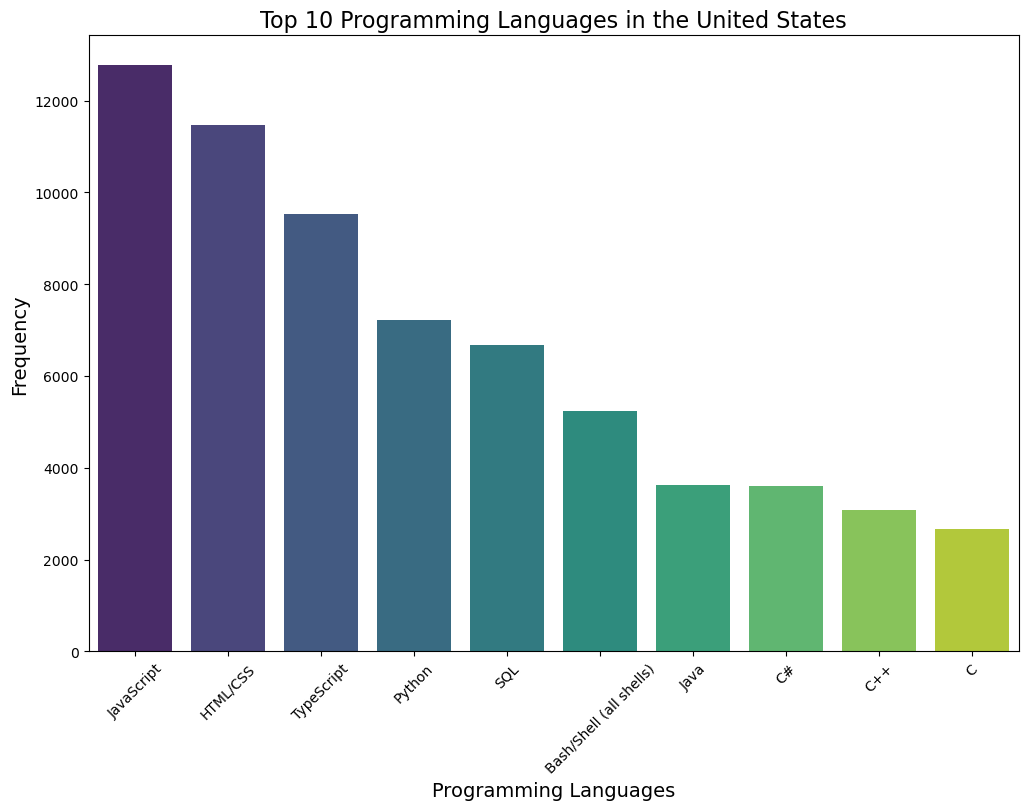

In [19]:
# Plotting the top 10 programming languages
plt.figure(figsize=(12, 8))
sns.barplot(x=languages_count.head(10).index, y=languages_count.head(10).values, palette='viridis')

# Adding titles and labels
plt.title('Top 10 Programming Languages in the United States', fontsize=16)
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [20]:
# Calculating the correlation coefficient to quantify the relationship between the two variables
correlation = df[['YearsCodePro', 'JobSatPoints_1']].corr()
print(correlation)

                YearsCodePro  JobSatPoints_1
YearsCodePro        1.000000       -0.022982
JobSatPoints_1     -0.022982        1.000000


## Yearly Compensation

### _1. Analyzing and Visualizing Compensation Distribution_

In this section, I will plot the distribution and histogram for ConvertedCompYearly to examine the spread of yearly compensation among respondents.

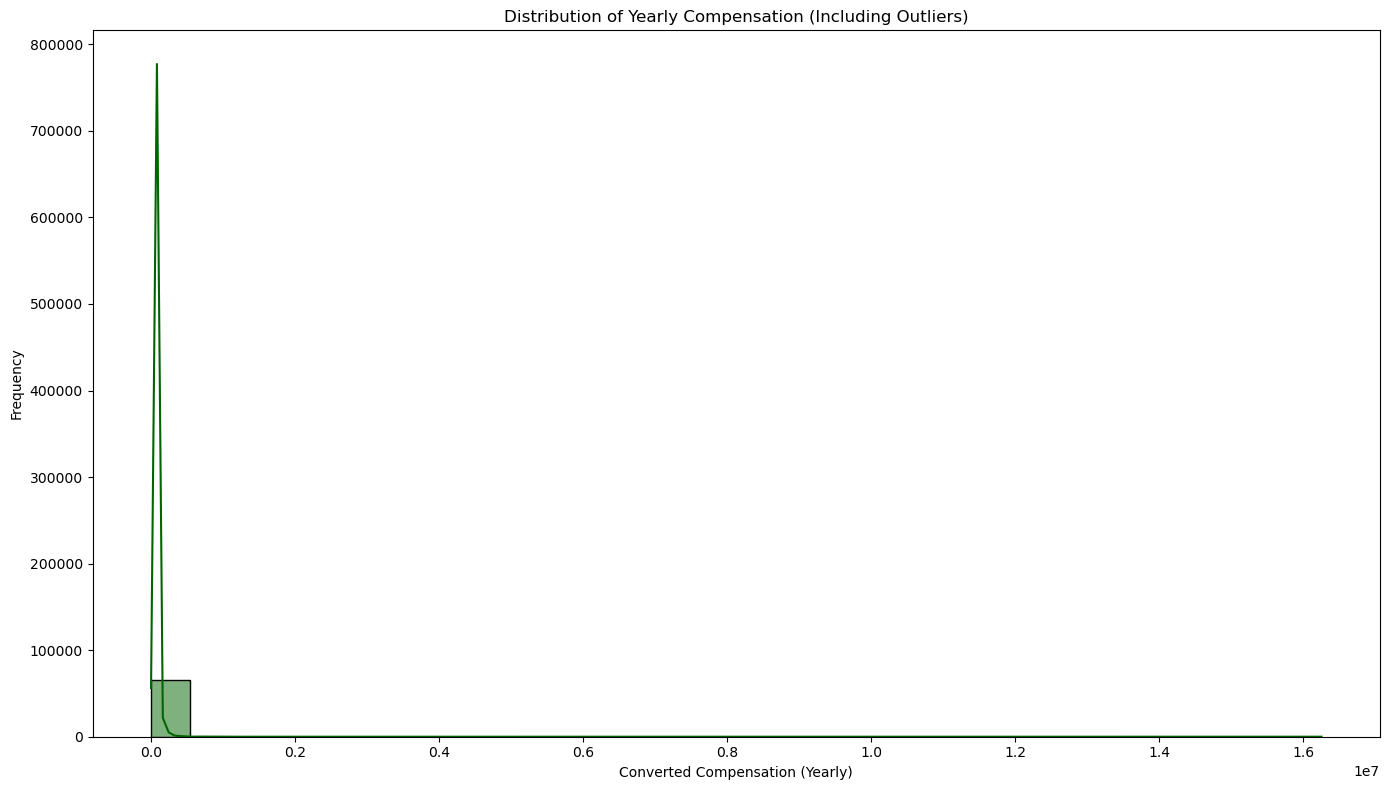

In [25]:
# Plot the histogram and density plot including outliers
plt.figure(figsize=(14, 8))

# Plot histogram with outliers included
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color='darkgreen')

# Customize the plot
plt.title("Distribution of Yearly Compensation (Including Outliers)")
plt.xlabel("Converted Compensation (Yearly)")
plt.ylabel("Frequency")
plt.tight_layout()

# Show the plot
plt.show()

### _2. High Compensation Outliers Analysis_ 

In this section, I will identify respondents with extremely high yearly compensation.

Step 1: Calculating basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.

In [29]:
# Calculating basic statistics
mean_compensation = df['ConvertedCompYearly'].mean()
median_compensation = df['ConvertedCompYearly'].median()
std_compensation = df['ConvertedCompYearly'].std()

# Displaying the statistics
print(f"Mean: {mean_compensation}")
print(f"Median: {median_compensation}")
print(f"Standard Deviation: {std_compensation}")

Mean: 86155.28726264133
Median: 86155.28726264134
Standard Deviation: 111761.35725234024


Step 2: Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

In [30]:
# Defining the threshold (3 standard deviations above the mean)
threshold = mean_compensation + 3 * std_compensation

# Identifying respondents with compensation values exceeding the threshold
high_compensation_respondents = df[df['ConvertedCompYearly'] > threshold]

# Displaying the number of respondents with extremely high compensation
print(f"Number of respondents with extremely high compensation: {len(high_compensation_respondents)}")

# Displaying the data for those respondents
high_compensation_respondents

Number of respondents with extremely high compensation: 193


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,20,10.0,"Developer, full-stack","10,000 or more employees",I have little or no influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,USD\tUnited States dollar,650000.0,C#;HTML/CSS;PowerShell;SQL;TypeScript,C#;Kotlin;Rust;TypeScript,C#;TypeScript,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),ASP.NET;Node.js;React,ASP.NET CORE;Blazor;React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET (5+) ;Roslyn,.NET (5+),MSBuild;npm;NuGet;pnpm;Webpack,Docker,Docker,Notepad++;Rider;Visual Studio;WebStorm,Notepad++;Rider;WebStorm,Notepad++;Rider;WebStorm,Windows,Windows,Wikis,Wikis,Wikis,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,Quickly finding code solutions;Learning new-to...,Neutral,"No, and I don't plan to",Favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase,Project planning,Search for answers,Writing code,Writing code,Writing code,Writing code,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Yes,Individual contributor,10.000000,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Disagree,Disagree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,60-120 minutes a day,Amount of technical debt,Automated testing;Knowledge sharing community,Hybrid (on-prem and cloud),Internal Developer portal,Software Development,0.000000,0.00000,0.000000,40.000000,20.00000,0.000000,30.000000,10

### _3. Detecting Outliers in Compensation_

Now, I will identify outliers in the ConvertedCompYearly column using the IQR method. To perform this task, I will:

* Calculate the Interquartile Range (IQR).

* Determine the upper and lower bounds for outliers.

* Count and visualize outliers using a box plot.

Step 1: Calculating the Interquartile Range (IQR). 

In [32]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculating IQR (Interquartile Range)
IQR = Q3 - Q1

Step 2: Determining the upper and lower bounds for outliers.

In [34]:
# Determining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Step 3: Counting and visualizing outliers using a box plot.

Number of outliers: 23435


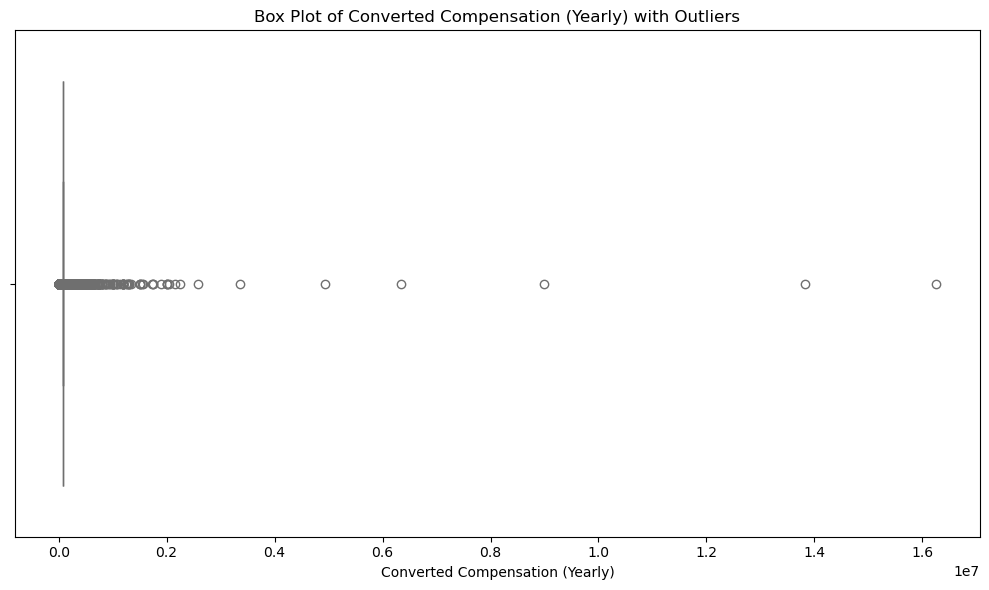

In [35]:
# Identifying outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

# Displaying the number of outliers
print(f"Number of outliers: {num_outliers}")

# Boxing plot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title("Box Plot of Converted Compensation (Yearly) with Outliers")
plt.xlabel("Converted Compensation (Yearly)")
plt.tight_layout()

plt.show()

### _4. Removing Outliers_

To remove the outliers from the dataset based on the IQR method and create a new DataFrame excluding the outliers, I will follow these steps:

* Remove outliers using the bounds determined earlier (lower and upper bounds).

* Create a new DataFrame that excludes the rows with outliers in the ConvertedCompYearly column.

* Validate the size of the new DataFrame.

In [38]:
# Step 1: Remove outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

In [39]:
# Step 2: Validate the size of the new DataFrame
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
removed_rows = original_size - new_size

In [40]:
# Print validation information
print(f"Original size of the DataFrame: {original_size}")
print(f"Size after removing outliers: {new_size}")
print(f"Number of rows removed: {removed_rows}")

Original size of the DataFrame: 65437
Size after removing outliers: 42002
Number of rows removed: 23435


In [41]:
# Preview the new DataFrame
df_no_outliers.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,2.0,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,2.963841e+145,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+),.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,I have never visited Stack Overflow or the Sta...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"No, not really",Yes,Very favorable,Increase productivity,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase,Project planning,Search for answers,Writing code,Writing code,Writing code,Writing code,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,No,Individual contributor,11.466957,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0-5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentat

Copyright © IBM Corporation. All rights reserved.